# HHT Graphs

In [1]:
import sys
import os

In [22]:
import numpy as np

In [8]:
sys.path.append(r'D:\Repositories\PhD\src')

In [9]:
sys.path

['d:\\Anaconda\\envs\\ml-cpu\\python311.zip',
 'd:\\Anaconda\\envs\\ml-cpu\\DLLs',
 'd:\\Anaconda\\envs\\ml-cpu\\Lib',
 'd:\\Anaconda\\envs\\ml-cpu',
 '',
 'd:\\Anaconda\\envs\\ml-cpu\\Lib\\site-packages',
 'd:\\Anaconda\\envs\\ml-cpu\\Lib\\site-packages\\win32',
 'd:\\Anaconda\\envs\\ml-cpu\\Lib\\site-packages\\win32\\lib',
 'd:\\Anaconda\\envs\\ml-cpu\\Lib\\site-packages\\Pythonwin',
 '..',
 'D:\\Repositories\\PhD\\src']

In [11]:
from classes import hht_graphs

In [12]:
import pandas as pd

In [13]:
df_1730 = pd.read_csv(r'D:\Repositories\PhD\parsed_data\EE_data\1730_case_edu.csv')
df_1797 = pd.read_csv(r'D:\Repositories\PhD\parsed_data\EE_data\1797_case_edu.csv')

In [14]:
df_1730

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
0,0.014603,0.192922,0,3,1730,0,12000,0,0
1,0.054449,0.164364,0,3,1730,0,12000,0,0
2,0.107646,0.090811,0,3,1730,0,12000,0,0
3,0.133722,0.086496,0,3,1730,0,12000,0,0
4,0.112652,0.099235,0,3,1730,0,12000,0,0
...,...,...,...,...,...,...,...,...,...
3528365,0.091857,0.155118,21,3,1730,2,48000,1,1
3528366,0.028101,-0.093087,21,3,1730,2,48000,1,1
3528367,-0.061238,-0.144956,21,3,1730,2,48000,1,1
3528368,0.079918,0.077803,21,3,1730,2,48000,1,1


In [15]:
df_1797

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
0,0.053197,0.145667,0,0,1797,0,12000,0,0
1,0.088662,0.097796,0,0,1797,0,12000,0,0
2,0.099718,0.054856,0,0,1797,0,12000,0,0
3,0.058621,0.036982,0,0,1797,0,12000,0,0
4,-0.004590,0.054445,0,0,1797,0,12000,0,0
...,...,...,...,...,...,...,...,...,...
3405142,-0.320642,-0.199291,21,0,1797,2,48000,3,1
3405143,0.047982,-0.487955,21,0,1797,2,48000,3,1
3405144,0.306873,-0.015409,21,0,1797,2,48000,3,1
3405145,-0.050902,0.155529,21,0,1797,2,48000,3,1


# 1730

In [36]:
import importlib

In [37]:
importlib.reload(hht_graphs)

<module 'classes.hht_graphs' from 'D:\\Repositories\\PhD\\src\\classes\\hht_graphs.py'>

In [38]:
hht = hht_graphs.HHT(max_imfs=6, max_siftings=100, sd_thresh=0.2, envelope_bc='auto')

In [17]:
x_healthy_1730 = df_1730[df_1730['fault'] == 0]['DE']
x_healthy_1730

0         0.014603
1         0.054449
2         0.107646
3         0.133722
4         0.112652
            ...   
485638    0.035673
485639   -0.004590
485640   -0.023574
485641    0.005215
485642    0.047773
Name: DE, Length: 485643, dtype: float64

In [54]:
df_1730[(df_1730['fault'] == 1) & (df_1730['fault_diameter'] == 21) & (df_1730['fault_element'] == 2) & (df_1730['fault_end'] == 1)]

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
1462932,0.072446,0.119780,21,3,1730,1,12000,2,1
1462933,0.047918,0.150598,21,3,1730,1,12000,2,1
1462934,-0.250800,0.074785,21,3,1730,1,12000,2,1
1462935,-0.025665,0.057527,21,3,1730,1,12000,2,1
1462936,0.209541,0.132518,21,3,1730,1,12000,2,1
...,...,...,...,...,...,...,...,...,...
1585063,0.201744,0.029175,21,3,1730,1,12000,2,1
1585064,-0.161136,-0.024449,21,3,1730,1,12000,2,1
1585065,-0.142131,0.001644,21,3,1730,1,12000,2,1
1585066,0.058152,0.042118,21,3,1730,1,12000,2,1


In [20]:
x_faulty_1730_small = df_1730[(df_1730['fault'] == 1) & (df_1730['fault_diameter'] == 7) & (df_1730['fault_element'] == 2) & (df_1730['fault_end'] == 1)]['DE']
x_faulty_1730_big = df_1730[(df_1730['fault'] == 1) & (df_1730['fault_diameter'] == 21) & (df_1730['fault_element'] == 2) & (df_1730['fault_end'] == 1)]['DE']

In [21]:
x_faulty_1730_big

1462932    0.072446
1462933    0.047918
1462934   -0.250800
1462935   -0.025665
1462936    0.209541
             ...   
1585063    0.201744
1585064   -0.161136
1585065   -0.142131
1585066    0.058152
1585067   -0.052304
Name: DE, Length: 122136, dtype: float64

In [30]:
fs = df_1730['samples_per_second'][0]  # Hz
N_healthy = 1000
N_faulty_small = 1000
N_faulty_big = 1000
t_healthy = np.arange(N_healthy) / fs
t_faulty_small = np.arange(N_faulty_small) / fs
t_faulty_big = np.arange(N_faulty_big) / fs

In [39]:
res_healthy = hht.transform(x_healthy_1730[:1000], fs, t_healthy)
res_faulty_small = hht.transform(x_faulty_1730_small[:1000], fs, t_faulty_small)
res_faulty_big = hht.transform(x_faulty_1730_big[:1000], fs, t_faulty_big)

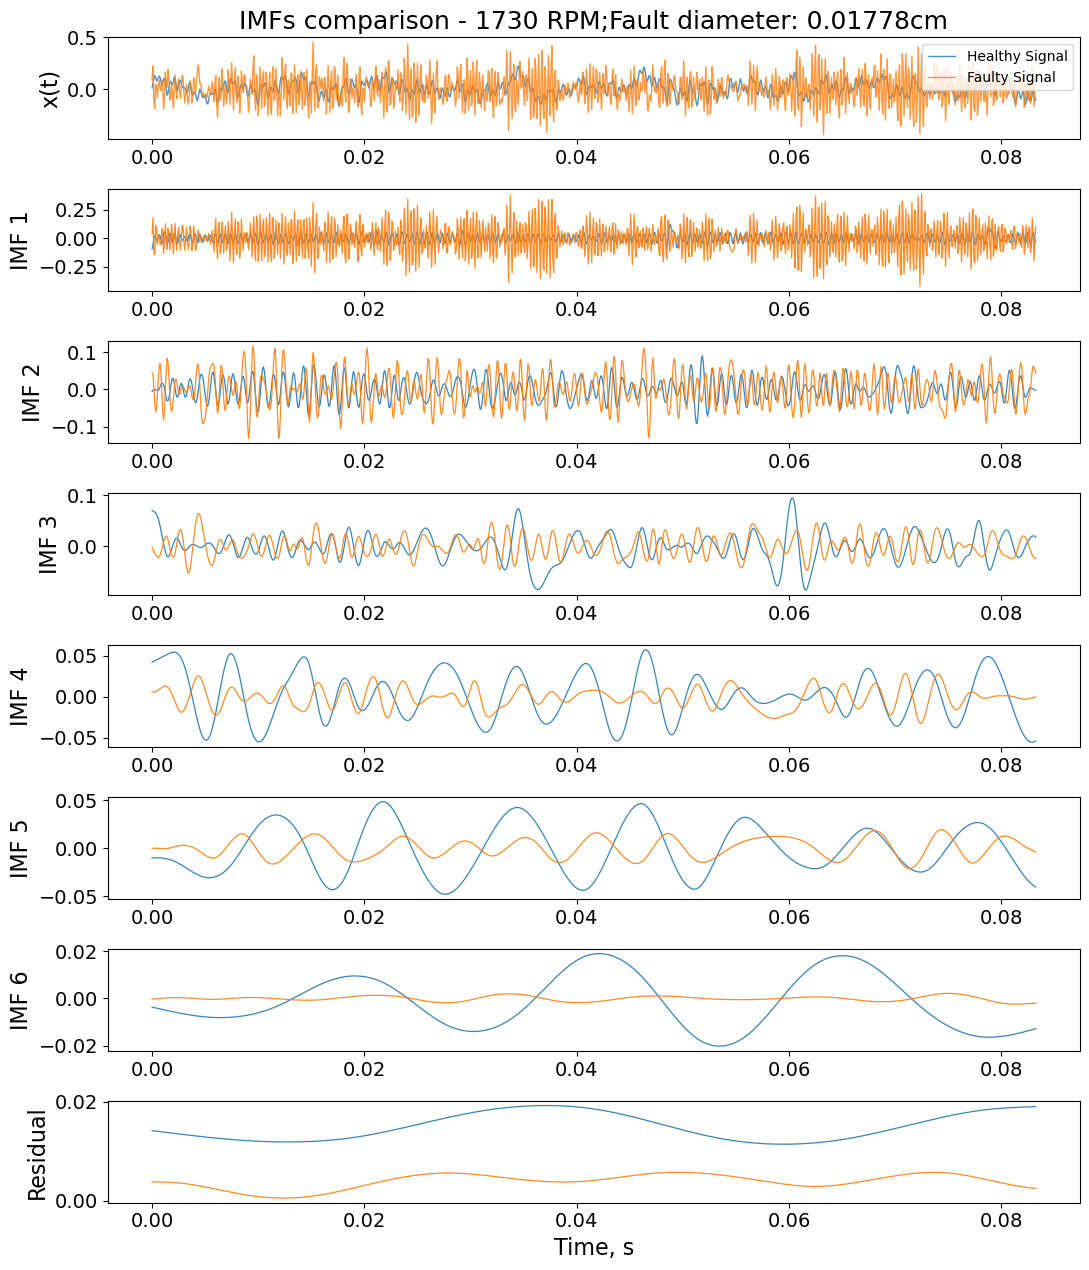

In [45]:
hht_graphs.plot_imfs_compare_three(x_healthy_1730[:1000], t_healthy, res_healthy['imfs'], res_healthy['residual'],
                                  x_faulty_1730_small[:1000], t_faulty_small, res_faulty_small['imfs'], res_faulty_small['residual'],
                                  labels=("Healthy Signal","Faulty Signal","C"),
                                  title="IMFs comparison - 1730 RPM;Fault diameter: 0.01778cm")

In [44]:
res_healthy['amplitude']

array([[0.09566105, 0.07865506, 0.04824748, ..., 0.06746161, 0.05873141,
        0.06892836],
       [0.00529934, 0.00481038, 0.00318035, ..., 0.0024108 , 0.0021772 ,
        0.00271546],
       [0.0898876 , 0.07198027, 0.07012235, ..., 0.03882665, 0.03472208,
        0.06173932],
       [0.14318378, 0.08783144, 0.08867338, ..., 0.09099849, 0.09175102,
        0.14614932],
       [0.02891067, 0.01306907, 0.01364167, ..., 0.03937351, 0.04009832,
        0.04796206],
       [0.01608748, 0.01041252, 0.01035353, ..., 0.01659558, 0.0164573 ,
        0.02038466]])

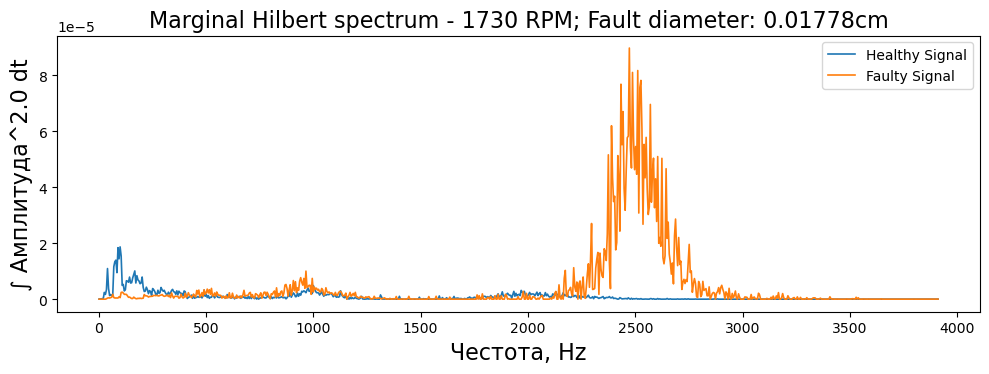

In [49]:
hht_graphs.plot_marginal_spectrum_compare(res_healthy['frequency'], res_healthy['amplitude'], t_healthy,
                                   res_faulty_small['frequency'], res_faulty_small['amplitude'], t_faulty_small,
                                   freq3=None, amp3=None, t3=None,
                                   fmax=None, nbins_f=800, power=2.0,
                                   labels=("Healthy Signal","Faulty Signal","C"),
                                   title="Marginal Hilbert spectrum - 1730 RPM; Fault diameter: 0.01778cm")

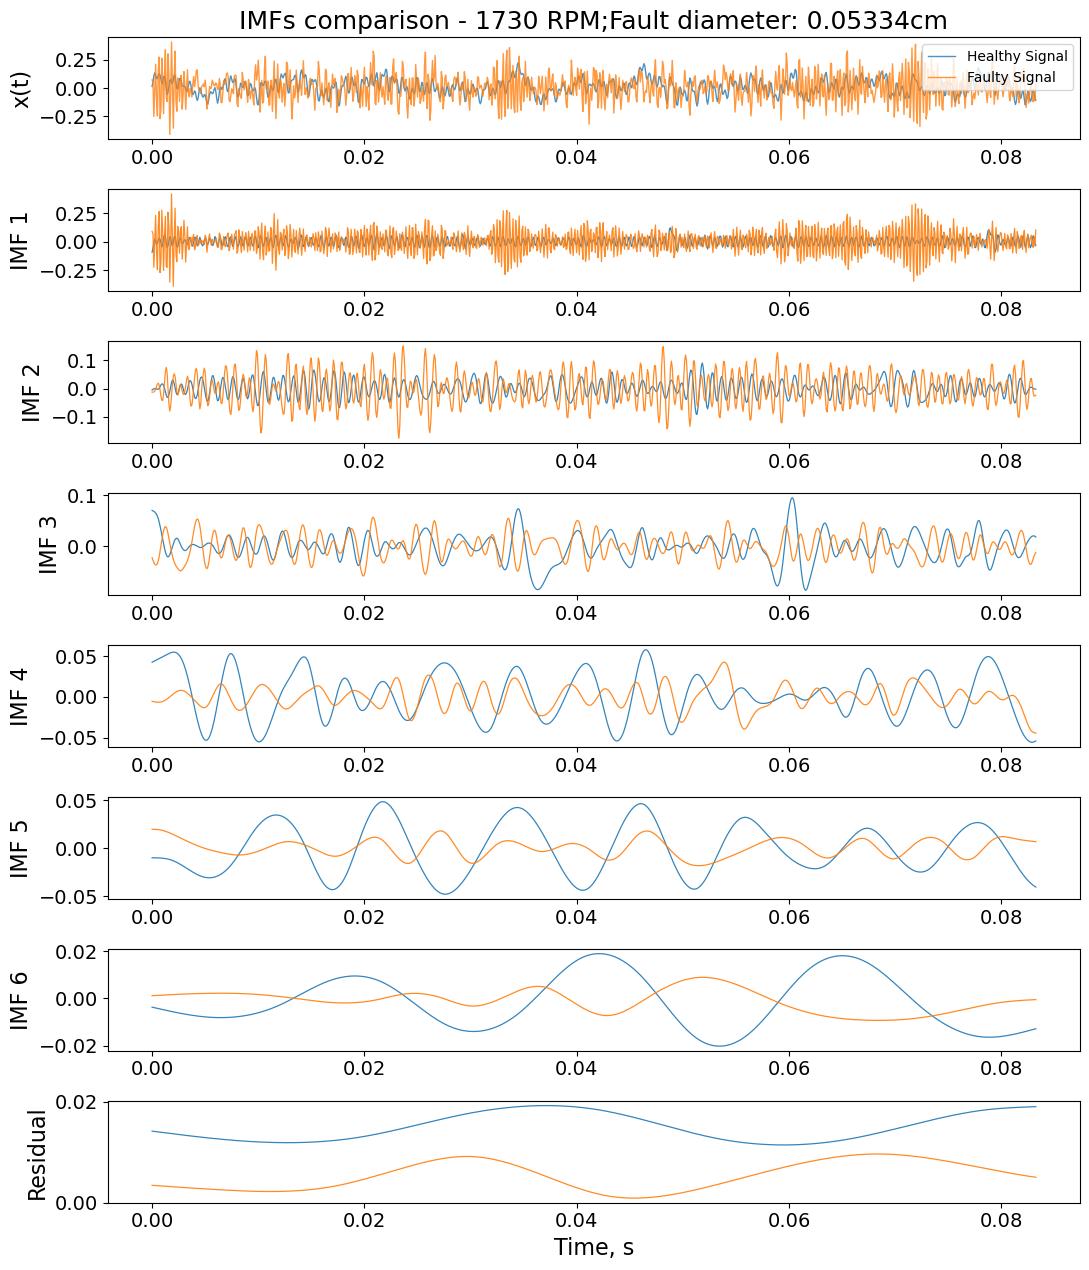

In [46]:
hht_graphs.plot_imfs_compare_three(x_healthy_1730[:1000], t_healthy, res_healthy['imfs'], res_healthy['residual'],
                                  x_faulty_1730_big[:1000], t_faulty_big, res_faulty_big['imfs'], res_faulty_big['residual'],
                                  labels=("Healthy Signal","Faulty Signal","C"),
                                  title="IMFs comparison - 1730 RPM;Fault diameter: 0.05334cm")

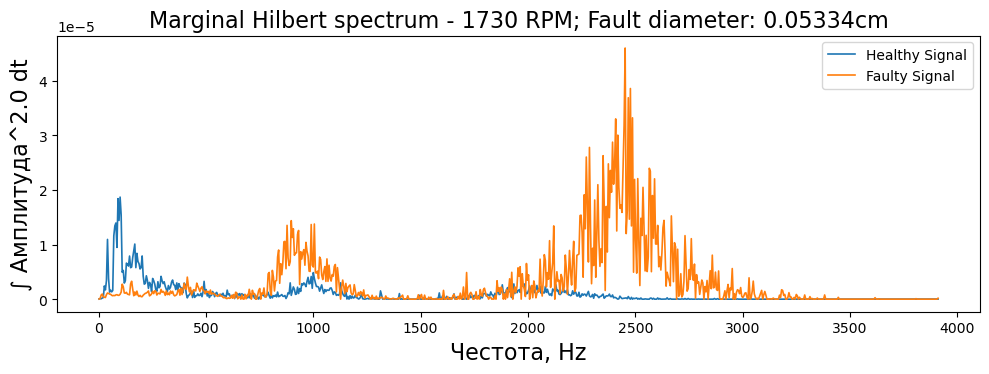

In [50]:
hht_graphs.plot_marginal_spectrum_compare(res_healthy['frequency'], res_healthy['amplitude'], t_healthy,
                                   res_faulty_big['frequency'], res_faulty_big['amplitude'], t_faulty_big,
                                   freq3=None, amp3=None, t3=None,
                                   fmax=None, nbins_f=800, power=2.0,
                                   labels=("Healthy Signal","Faulty Signal","C"),
                                   title="Marginal Hilbert spectrum - 1730 RPM; Fault diameter: 0.05334cm")

# 1797

In [51]:
x_healthy_1797 = df_1797[df_1797['fault'] == 0]['DE']
x_faulty_1797_small = df_1797[(df_1797['fault'] == 1) & (df_1797['fault_diameter'] == 7) & (df_1797['fault_element'] == 2) & (df_1797['fault_end'] == 1)]['DE']
x_faulty_1797_big = df_1797[(df_1797['fault'] == 1) & (df_1797['fault_diameter'] == 21) & (df_1797['fault_element'] == 2) & (df_1797['fault_end'] == 1)]['DE']

In [57]:
df_1797[(df_1797['fault'] == 1) & (df_1797['fault_diameter'] == 21) & (df_1797['fault_element'] == 2) & (df_1797['fault_end'] == 1)]

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
1219865,-0.007959,0.091222,21,0,1797,1,12000,2,1
1219866,0.025340,-0.072115,21,0,1797,1,12000,2,1
1219867,0.000162,-0.038625,21,0,1797,1,12000,2,1
1219868,0.092913,0.094098,21,0,1797,1,12000,2,1
1219869,-0.007797,-0.098618,21,0,1797,1,12000,2,1
...,...,...,...,...,...,...,...,...,...
1341851,0.004711,0.087113,21,0,1797,1,12000,2,1
1341852,0.143755,0.165185,21,0,1797,1,12000,2,1
1341853,0.105583,-0.054240,21,0,1797,1,12000,2,1
1341854,-0.078294,-0.055267,21,0,1797,1,12000,2,1


In [58]:
df_1797['samples_per_second'][0]

12000

In [59]:
fs = df_1797['samples_per_second'][0]  # Hz
N_healthy = 1000
N_faulty_small = 1000
N_faulty_big = 1000
t_healthy = np.arange(N_healthy) / fs
t_faulty_small = np.arange(N_faulty_small) / fs
t_faulty_big = np.arange(N_faulty_big) / fs

In [60]:
res_healthy = hht.transform(x_healthy_1797[:1000], fs, t_healthy)
res_faulty_small = hht.transform(x_faulty_1797_small[:1000], fs, t_faulty_small)
res_faulty_big = hht.transform(x_faulty_1797_big[:1000], fs, t_faulty_big)

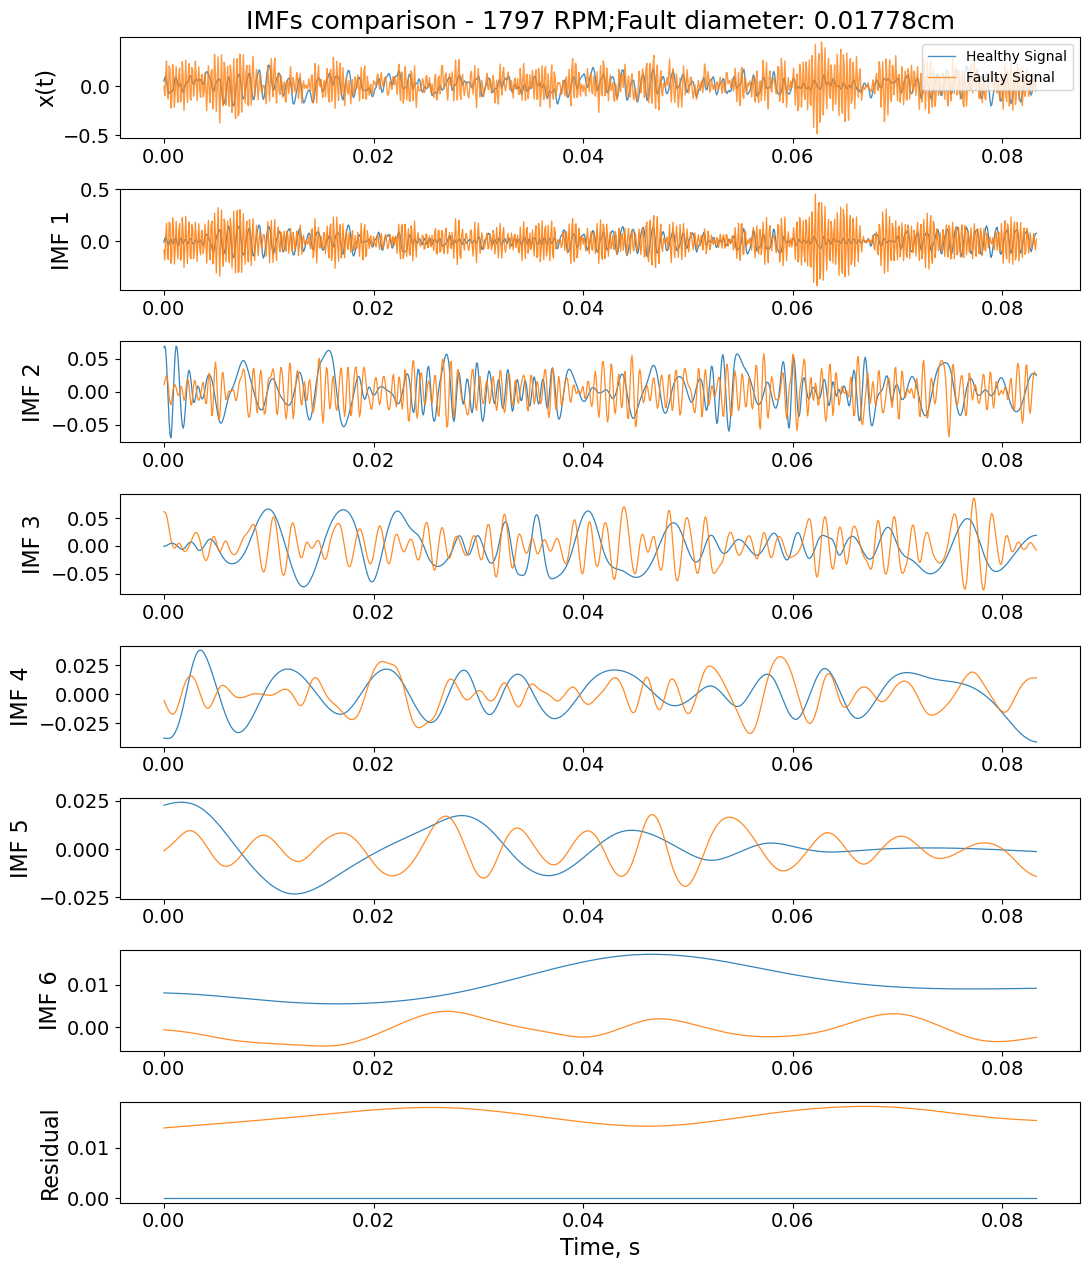

In [61]:
hht_graphs.plot_imfs_compare_three(x_healthy_1797[:1000], t_healthy, res_healthy['imfs'], res_healthy['residual'],
                                  x_faulty_1797_small[:1000], t_faulty_small, res_faulty_small['imfs'], res_faulty_small['residual'],
                                  labels=("Healthy Signal","Faulty Signal","C"),
                                  title="IMFs comparison - 1797 RPM;Fault diameter: 0.01778cm")

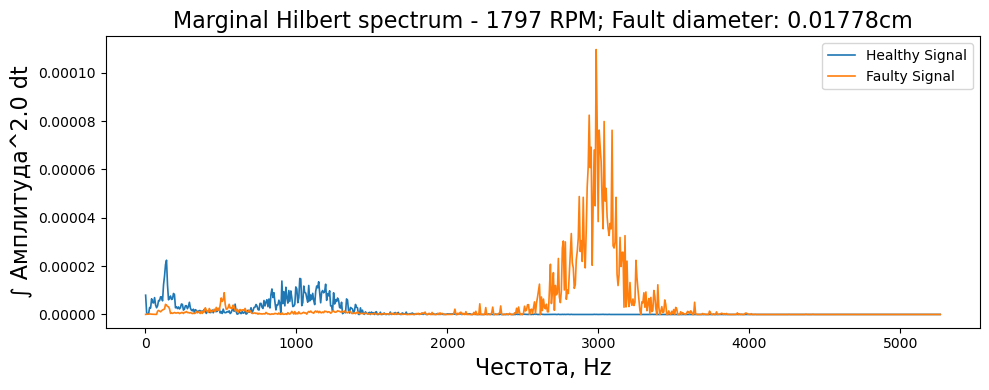

In [62]:
hht_graphs.plot_marginal_spectrum_compare(res_healthy['frequency'], res_healthy['amplitude'], t_healthy,
                                   res_faulty_small['frequency'], res_faulty_small['amplitude'], t_faulty_small,
                                   freq3=None, amp3=None, t3=None,
                                   fmax=None, nbins_f=800, power=2.0,
                                   labels=("Healthy Signal","Faulty Signal","C"),
                                   title="Marginal Hilbert spectrum - 1797 RPM; Fault diameter: 0.01778cm")

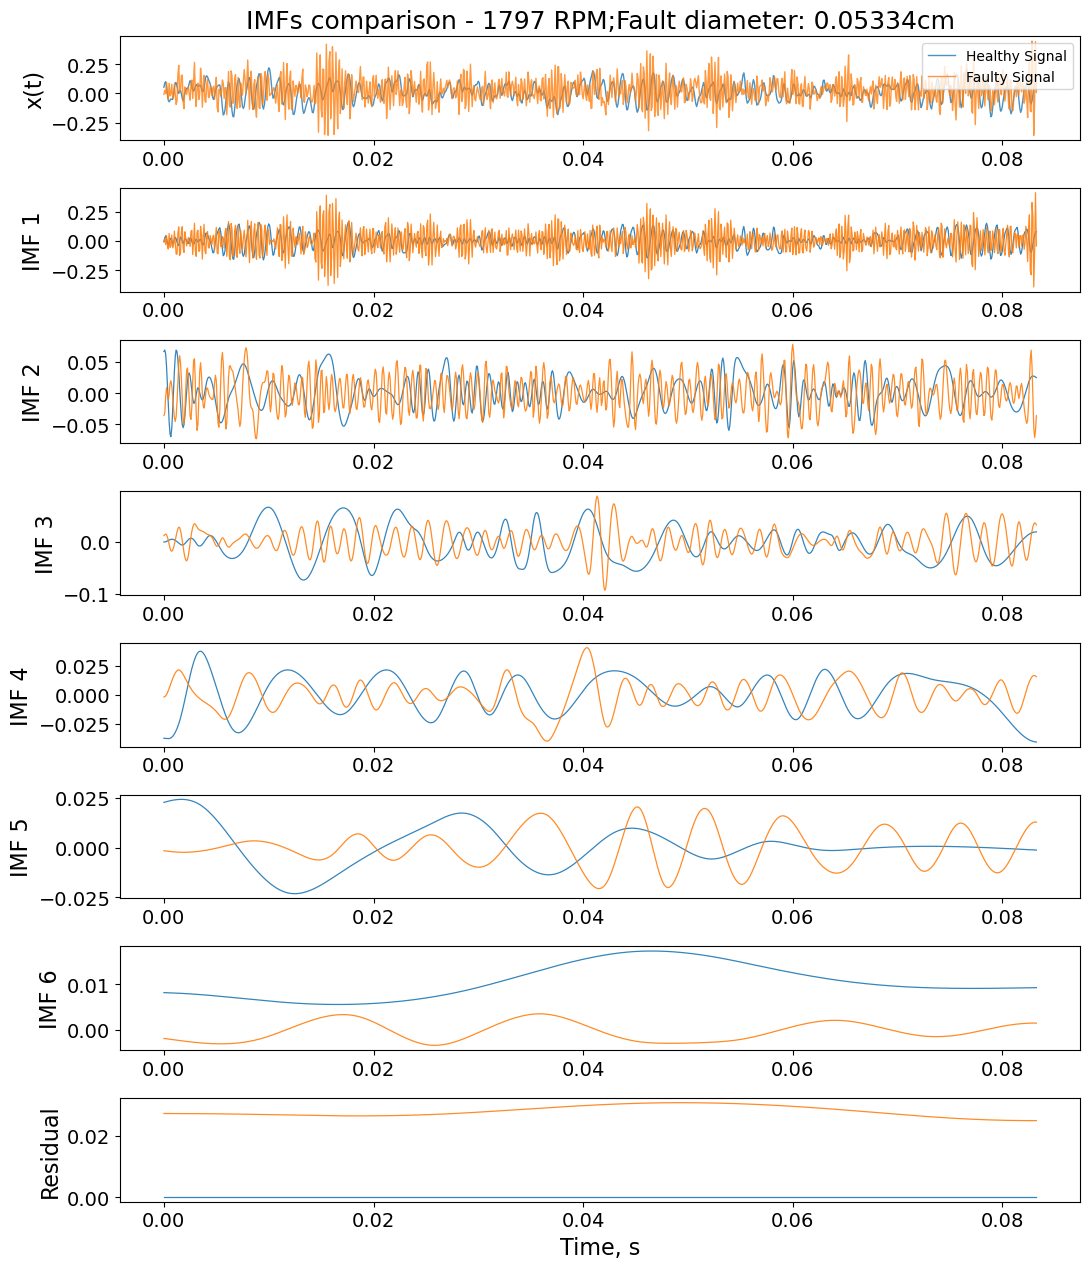

In [63]:
hht_graphs.plot_imfs_compare_three(x_healthy_1797[:1000], t_healthy, res_healthy['imfs'], res_healthy['residual'],
                                  x_faulty_1797_big[:1000], t_faulty_big, res_faulty_big['imfs'], res_faulty_big['residual'],
                                  labels=("Healthy Signal","Faulty Signal","C"),
                                  title="IMFs comparison - 1797 RPM;Fault diameter: 0.05334cm")

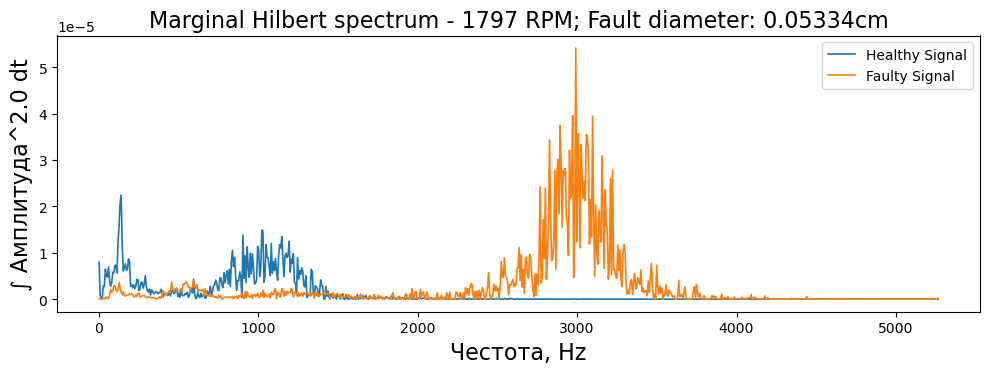

In [64]:
hht_graphs.plot_marginal_spectrum_compare(res_healthy['frequency'], res_healthy['amplitude'], t_healthy,
                                   res_faulty_big['frequency'], res_faulty_big['amplitude'], t_faulty_big,
                                   freq3=None, amp3=None, t3=None,
                                   fmax=None, nbins_f=800, power=2.0,
                                   labels=("Healthy Signal","Faulty Signal","C"),
                                   title="Marginal Hilbert spectrum - 1797 RPM; Fault diameter: 0.05334cm")